# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'units=metric&appid={weather_api_key}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | yulinshi
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | flying fish cove
Processing Record 5 of Set 1 | mugia
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | shijiang
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | jolo
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | xilin hot
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | al bayda'
Processing Record 20 of Set 1 | ouellah
City not found. Skipping...
Processing Record 21 of Set 1 | mount gambie

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
city_data_df

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,2.88,94,100,3.77,IS,1718762004
1,yulinshi,38.2906,109.7494,28.73,39,12,5.51,CN,1718761740
2,stanley,54.8680,-1.6985,9.01,94,75,1.54,GB,1718762005
3,flying fish cove,-10.4217,105.6791,26.82,78,75,7.20,CX,1718762005
4,mugia,43.1041,-9.2179,12.31,88,86,1.35,ES,1718762005


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,2.88,94,100,3.77,IS,1718762004
1,yulinshi,38.2906,109.7494,28.73,39,12,5.51,CN,1718761740
2,stanley,54.8680,-1.6985,9.01,94,75,1.54,GB,1718762005
3,flying fish cove,-10.4217,105.6791,26.82,78,75,7.20,CX,1718762005
4,mugia,43.1041,-9.2179,12.31,88,86,1.35,ES,1718762005


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

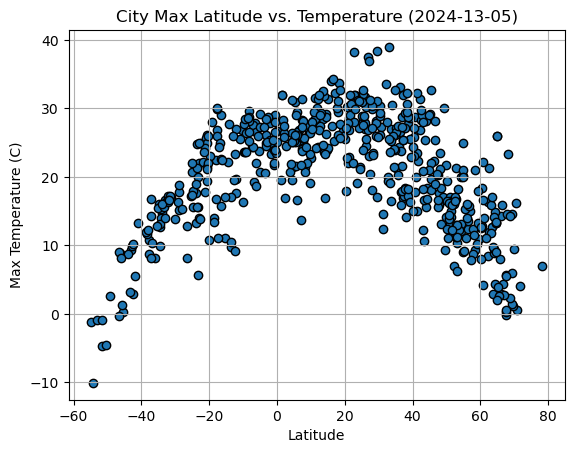

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-13-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

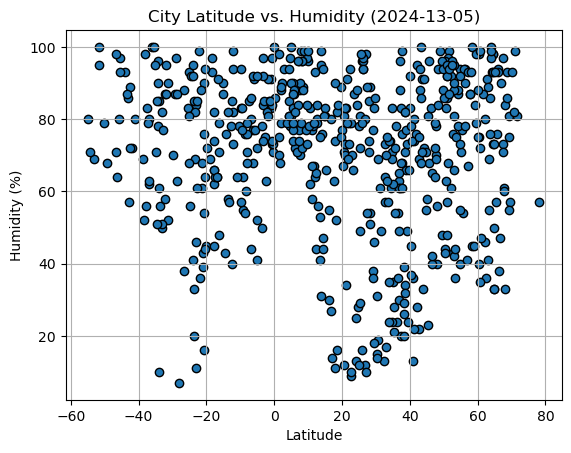

In [9]:
# Build scatter plot for latitude vs. temperature
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-13-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

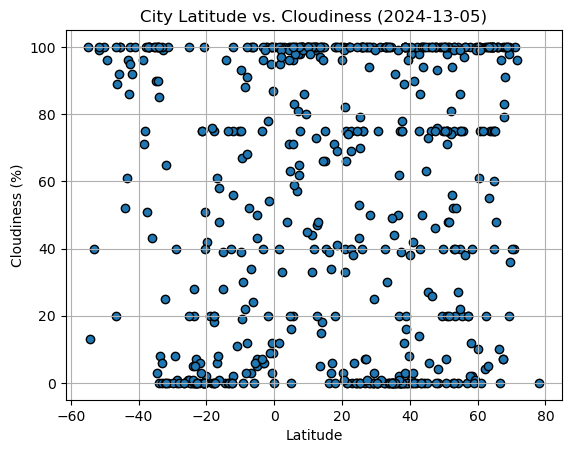

In [10]:
# Build scatter plot for latitude vs. temperature
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-13-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

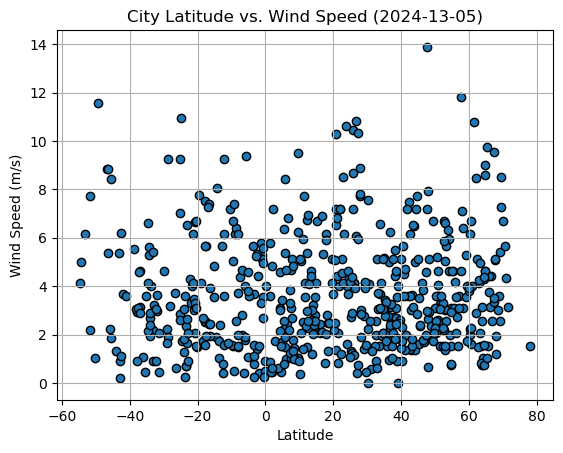

In [11]:
# Build scatter plot for latitude vs. temperature
wind = city_data_df['Wind Speed']
plt.scatter(latitude, wind, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-13-05)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def calculate_correlation (element1, element2):
    correlation, _ = st.pearsonr(element1, element2)
    slope, intercept, r_value, p_value, std_err = st.linregress(element2, element1)
    regression_values = element1 * slope + intercept
    return (r_value, regression_values, intercept, slope)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,2.88,94,100,3.77,IS,1718762004
1,yulinshi,38.2906,109.7494,28.73,39,12,5.51,CN,1718761740
2,stanley,54.8680,-1.6985,9.01,94,75,1.54,GB,1718762005
4,mugia,43.1041,-9.2179,12.31,88,86,1.35,ES,1718762005
5,kingston,17.9970,-76.7936,29.53,74,20,6.17,JM,1718762006


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,flying fish cove,-10.4217,105.6791,26.82,78,75,7.20,CX,1718762005
6,blackmans bay,-43.0167,147.3167,9.29,86,96,0.89,AU,1718762006
7,puerto natales,-51.7236,-72.4875,-4.72,95,99,2.19,CL,1718762006
8,ushuaia,-54.8000,-68.3000,-1.19,80,100,4.12,AR,1718762007
9,adamstown,-25.0660,-130.1015,20.65,93,100,7.01,PN,1718762007


###  Temperature vs. Latitude Linear Regression Plot

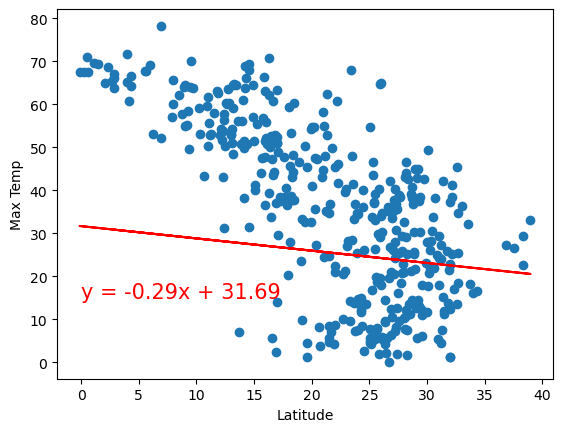

The r-value is: -0.6962811423090405


In [15]:
# Linear regression on Northern Hemisphere
temp_north = northern_hemi_df['Max Temp']
lat_north = northern_hemi_df['Lat']
r_value, regres, intercept, slope = calculate_correlation(temp_north, lat_north)

plt.scatter(temp_north, lat_north)
plt.plot(temp_north, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.text(0, 15, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

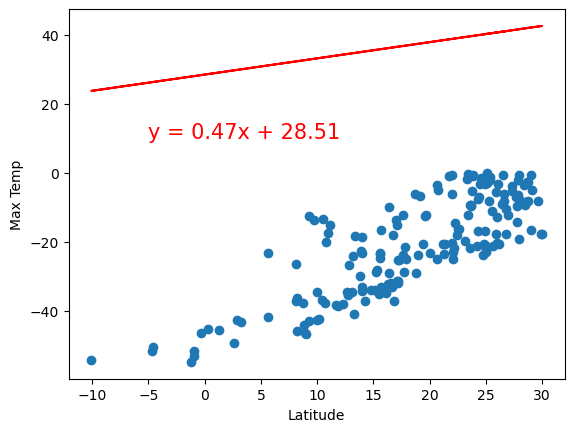

The r-value is: 0.8205005503800823


In [16]:
# Linear regression on Southern Hemisphere
temp_south = southern_hemi_df['Max Temp']
lat_south = southern_hemi_df['Lat']
r_value, regres, intercept, slope = calculate_correlation(temp_south, lat_south)

plt.scatter(temp_south, lat_south)
plt.plot(temp_south, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.text(-5, 10, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

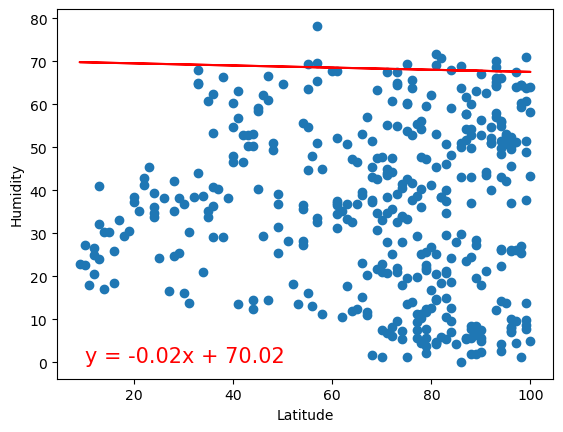

The r-value is: -0.020668932855586467


In [17]:
# Northern Hemisphere
hum_north = northern_hemi_df['Humidity']
r_value, regres, intercept, slope = calculate_correlation(hum_north, lat_north)

plt.scatter(hum_north, lat_north)
plt.plot(hum_north, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.text(10, 0, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

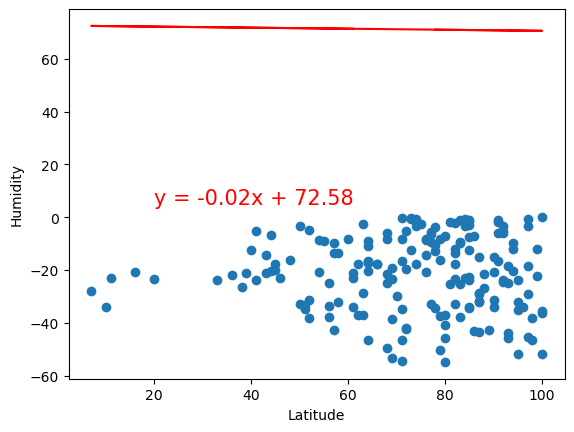

The r-value is: -0.014763934006877396


In [18]:
# Southern Hemisphere
hum_south = southern_hemi_df['Humidity']
r_value, regres, intercept, slope = calculate_correlation(hum_south, lat_south)

plt.scatter(hum_south, lat_south)
plt.plot(hum_south, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.text(20, 5, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

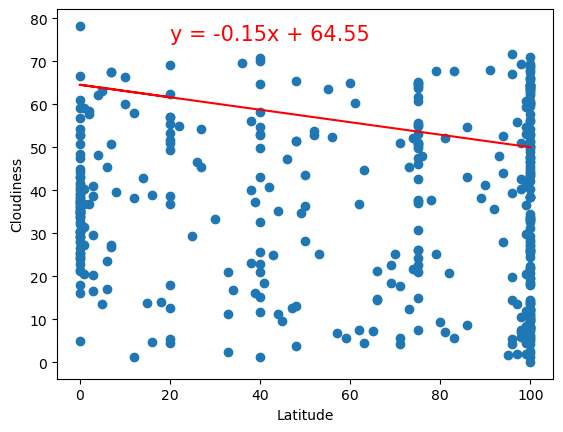

The r-value is: -0.07104274519024587


In [19]:
# Northern Hemisphere
cloud_north = northern_hemi_df['Cloudiness']
r_value, regres, intercept, slope = calculate_correlation(cloud_north, lat_north)

plt.scatter(cloud_north, lat_north)
plt.plot(cloud_north, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(20, 75, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

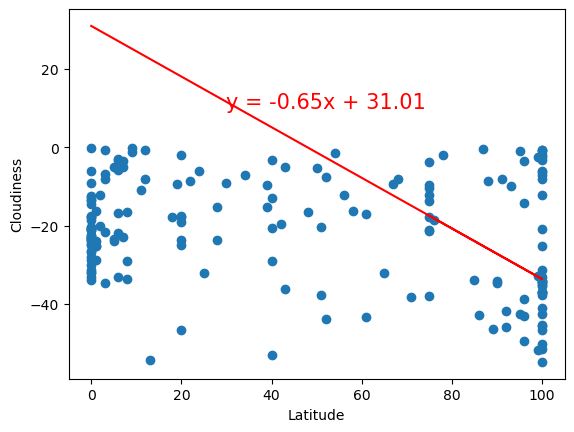

The r-value is: -0.22286369799287106


In [20]:
# Southern Hemisphere
cloud_south = southern_hemi_df['Cloudiness']
r_value, regres, intercept, slope = calculate_correlation(cloud_south, lat_south)

plt.scatter(cloud_south, lat_south)
plt.plot(cloud_south, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.text(30, 10, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

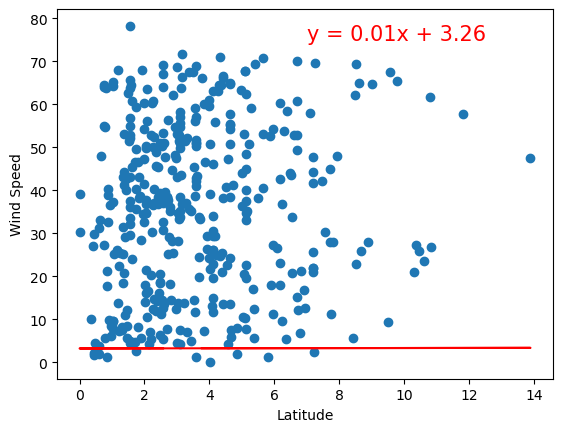

The r-value is: 0.08750221391764207


In [21]:
# Northern Hemisphere
wind_north = northern_hemi_df['Wind Speed']
r_value, regres, intercept, slope = calculate_correlation(wind_north, lat_north)

plt.scatter(wind_north, lat_north)
plt.plot(wind_north, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(7, 75, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

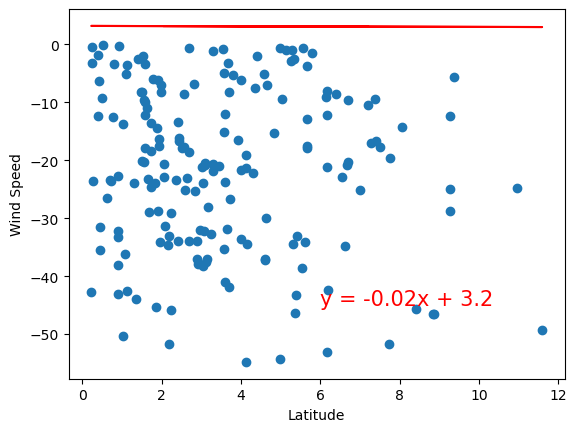

The r-value is: -0.10128517274752857


In [22]:
# Southern Hemisphere
wind_south = southern_hemi_df['Wind Speed']
r_value, regres, intercept, slope = calculate_correlation(wind_south, lat_south)

plt.scatter(wind_south, lat_south)
plt.plot(wind_south, regres, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.text(6, -45, f'y = {round(slope, 2)}x + {round(intercept, 2)}', color = 'red', fontsize = 15)
plt.show()

print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** When we look into temperatures in the two different hemispheres, we see that they are opposite, but this does not apply to every graph which means that not all weather characteristics are dependent on hemisphere